# Demo 1: Data capture in caprini

This is a very basic demonstration of the caprini data retrieval library.  The goal is to show a quick bit of how it can be used to:

* capture scope traces
* plot the captured data
* write the data to files for later analysis

Reproducing this example should be possible as long as you have a scope: we literally just capture a bunch of unconnected noise, then hook one channel up to the calibration source on the oscilloscope itself.  Note that your scope will have different noise than mine does.

To run this, do "Kernel > Restart & Run all" above.  The program will prompt you to change the probe configurations and then run a single capture.  After doing this, you hit enter in the text box it pops up and it will continue to run.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from caprini import DS4024_SCPI, WaveformBundle

In [3]:
def plot_waveform_bundle(wf_bundle, skip_figsize=False): 
    '''Plots most of a waveform, but skips the head
    
    There seems to be some ramp time at the head of captures?
    
    wf_bundle: the WaveformBundle to plot
    skip_figsize: Skip setting figure size (also skips setting black background)
    '''
    
    # Match the colors on the scope
    colors = {
        "CHAN1": "yellow",
        "CHAN2": "cyan",
        "CHAN3": "pink",
        "CHAN4": "tab:blue",
        "MATH": "purple",
    }
    
    # Get our waveform values
    waveforms = wf_bundle.waveforms
    
    # And our net names
    nets = wf_bundle.channel_names
    
    if not skip_figsize:
        fig = figure(figsize=(15,10),     # Make it bigger
               facecolor=(1,1,1,1), # Make the frame opaque
              )
    for c in waveforms:
        wf = waveforms[c]
        cset = wf.channel_settings

        lbl = f'{c}: {nets[c]}'
        
        if c == "MATH":
            offset = 0
            bias = 0
        else:
            offset = float(cset["OFFS"])
            bias = float(cset["BVOL"])

        plot(wf.t, wf.y-offset-bias, '-',
             alpha=1, label=lbl, color=colors.get(c), linewidth=0.8)

    # Make the background more scope-ish
    if not skip_figsize:
        fig.axes[0].set_facecolor("#080808")
    
    # And add a reticle
    grid(color="white", alpha=0.2)
    
    # draw the legend and set its text to white
    # plt.setp(legend().get_texts(), color='w')
    legend()
    
    ylabel("Volts")
    xlabel("Time")
    title(wf_bundle.title)

## Basic setup

This sets up our instrument and our basic set of connections that are used.

In [4]:
inst = DS4024_SCPI('ds4024.somerset')

In [5]:
channels = {
    "CHAN1": "Input left",
    "CHAN2": "Input right",
    "CHAN3": "Ouput left",
    "CHAN4": "Output right"
}

## Experiment 1: let stuff float

Let's see what this scope's output looks like when it's got nothing hooked up to.  Not for any real reason, just because it's a squeaky-clean demo that anyone can reproduce for themselves.

In [6]:
input("Please leave all probes disconnected, run a single capture, then hit enter here");

Please leave all probes disconnected, run a single capture, then hit enter here


Now capture the data.  This will take a few seconds, even for the very little data we capture here.

In [7]:
wfb_initial = WaveformBundle.collect("Initial data gathering", channels, inst)

And then plot the data using our helper defined above.

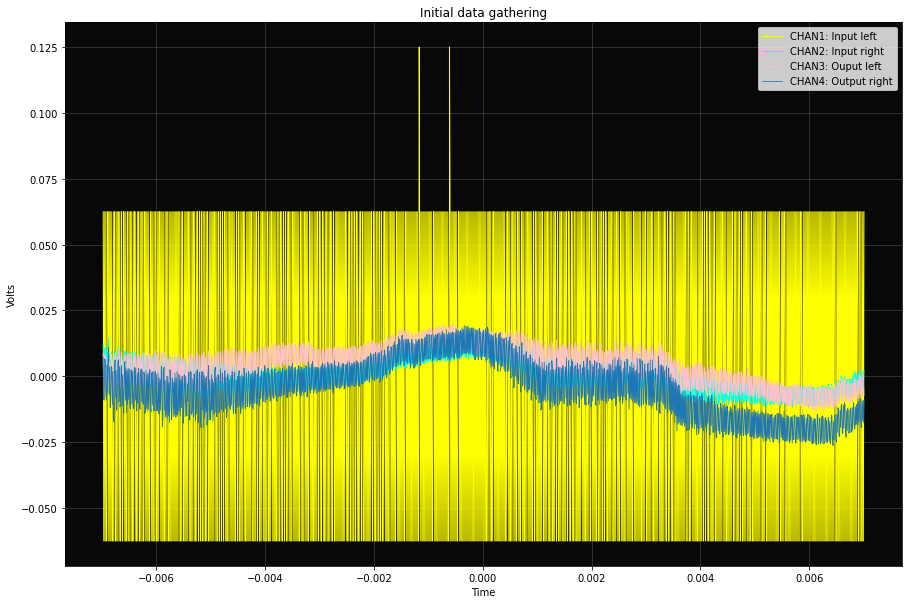

In [8]:
plot_waveform_bundle(wfb_initial)

That looks reasonably like what I see on the scope with nothing connected.  Save it out to JSON for later analysis the crack team of Data Scientists we hired when that was a fad.

In [10]:
with open("data_initial.json", "w") as fh:
    wfb_initial.to_json(fh)

## Experiment 2:

We're now going to connect the scope up with the test input on channel 1, and the rest still attached to nothing.

In [11]:
input("Please connect channel 1 to the square wave terminal and get a single-shot (y-scale of 2V should work)");

Please connect channel 1 to the square wave terminal and get a single-shot (y-scale of 2V should work)


In [12]:
wfb_test1 = WaveformBundle.collect("Test 1: ch1 to siggen", channels, inst)

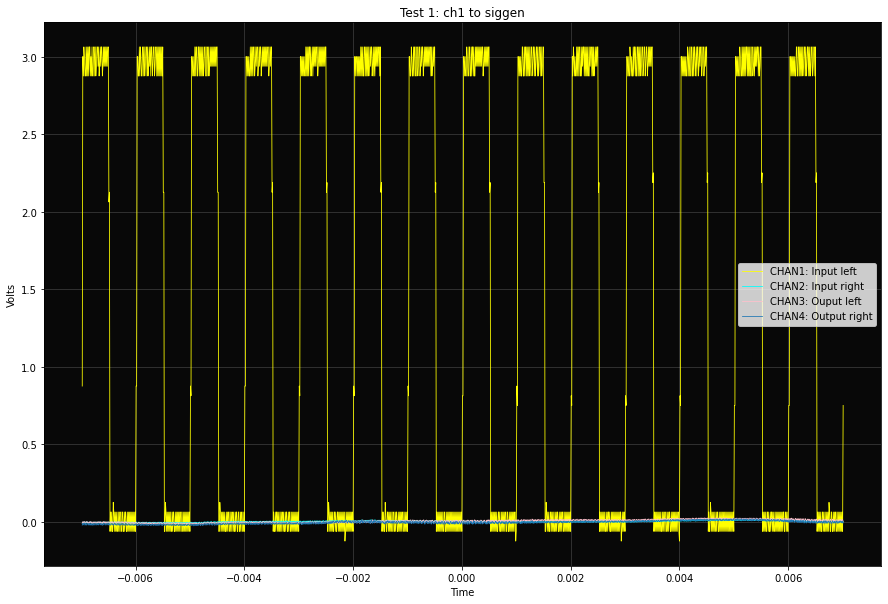

In [13]:
plot_waveform_bundle(wfb_test1)

In [15]:
with open("data_ch1_connected.json", "w") as fh:
    wfb_test1.to_json(fh)

You can now go over to [Demo 2: Use JSON files](demo_2_use_json.ipynb) to do more processing on the data collected here.